In [2]:
import numpy as np 
from numpy import random as rnd
from matplotlib import pyplot as plt
import sys,os,datetime,warnings

import tensorflow as tf
import pandas as pd
import seaborn as sns

from keras.models import Model,Sequential
from keras.layers import Dense,LSTM,Input,BatchNormalization,Conv2D,Conv2DTranspose,Activation,Concatenate,Bidirectional,CuDNNGRU,Dropout,Dot,Flatten,Embedding

from sklearn.model_selection import train_test_split

from scipy.stats import norm

sns.set()
warnings.filterwarnings('ignore')

C:\Users\Jan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
class RANDOM_PDF():
    # Initialize
    def __init__(self,N_MAX=10,MU_MIN=-5,MU_MAX=5,SIGMA_MIN=0.1,SIGMA_MAX=5):
        self.N_MAX = N_MAX
        self.MU_MIN = MU_MIN
        self.MU_MAX = MU_MAX
        self.SIGMA_MIN = SIGMA_MIN
        self.SIGMA_MAX = SIGMA_MAX
        self.initialized = False
        self.generate_parameters()
        return
    # Once create random parameters
    def generate_parameters(self):
        self.n_gaussians = rnd.randint(1,self.N_MAX) 
        self.mu_set = rnd.rand(self.n_gaussians)*(self.MU_MAX - self.MU_MIN) + self.MU_MIN
        self.sigma_set = rnd.rand(self.n_gaussians)*(self.SIGMA_MAX - self.SIGMA_MIN) + self.SIGMA_MIN
        self.initialized = True
        return
    # Evaluate PDF at point x
    def eval_cdf(self,x):
        y = 0
        for k in range(self.n_gaussians):
            y += (self.sigma_set[k]*norm.cdf(x+self.mu_set[k]))
        return y 
    # Sample PDF with multiple samples
    def sample_pdf(self,num_samples=1000):
        x = np.arange(self.MU_MIN-5,self.MU_MAX+5,0.01)
        y = self.eval_cdf(x)
        s = [x[np.argmin((y - ((max(y) - min(y))*rnd.rand()+min(y)))**2)] for k in range(num_samples)]
        return s

In [ ]:
class DEPENDENT_PDF():
    # Initialize
    def __init__(self,kernel_pdf,f):
        assert type(f) is type(lambda x: x) and type(kernel_pdf) is type(RANDOM_PDF()), 'Validate input types'
        self.kernel_pdf = kernel_pdf
        self.f = f
        return
    # Sample PDF with multiple samples
    def sample_pdf(self,num_samples=1000):
        X_o = self.kernel_pdf.sample_pdf(num_samples=num_samples)
        sample = [f(x) for x in X_o]
        return sample

[]

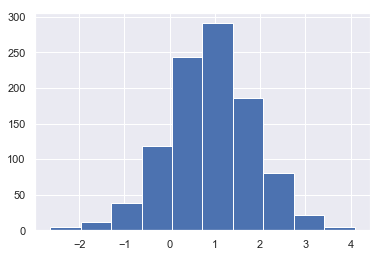

In [10]:
g = RANDOM_PDF()

plt.hist(g.sample_pdf())
plt.plot()